# MSc Thesis - Hugo Stam

### Example 05 - Port System Analysis

<img src="Figures/system_layout_alternative_1B.png" style="width:1000px">
<img src="Figures/system_layout_alternative_2B.png" style="width:1000px">
<img src="Figures/system_layout_alternative_3B.png" style="width:1000px">

##### Investment Strategy Simulation - Adaptive terminal planning

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

#### notes:


In [1]:
# packages for data handling
import numpy as np
import pandas as pd
import statistics as st

# packages related to time, space and id
import datetime, time
import platform
import random
from datetime import timedelta

# you need these dependencies packages related to the simulation
import simpy

# spatial libraries 
import shapely.geometry
from simplekml import Kml, Style

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
# sns.set(style="ticks")
# sns.set(style="darkgrid", palette = "pastel")
# sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system_onshore as container_system_onshore
from opentisim import container_system_offshore_barge as container_system_offshore_barge
from opentisim import container_system_offshore_bridge as container_system_offshore_bridge

# OpenCLSim package
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

# Additional import to save the initialisation of the simulation
import openclsim.savesim as savesim

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Alt 1
%store -r PV_alt1_6000
%store -r PV_alt1_12500
%store -r PV_alt1_21000

# Alt 2
%store -r PV_alt2_20_6000
%store -r PV_alt2_20_12500
%store -r PV_alt2_20_21000

%store -r PV_alt2_40_6000
%store -r PV_alt2_40_12500
%store -r PV_alt2_40_21000

%store -r PV_alt2_60_6000
%store -r PV_alt2_60_12500
%store -r PV_alt2_60_21000

# # Alt 3
# %store -r PV_alt3_20_6000
# %store -r PV_alt3_20_12500
# %store -r PV_alt3_20_21000

# %store -r PV_alt3_40_6000
# %store -r PV_alt3_40_12500
# %store -r PV_alt3_40_21000

# %store -r PV_alt3_60_6000
# %store -r PV_alt3_60_12500
# %store -r PV_alt3_60_21000

no stored variable PV_alt1_6000
no stored variable PV_alt1_12500
no stored variable PV_alt1_21000


,x,vessel,y
0,20.0,Panamax,-3.531382e+09
1,20.0,New-Panamax,-4.734573e+09
2,20.0,ULCS,-5.555650e+09
3,40.0,Panamax,-2.351991e+09
4,40.0,New-Panamax,-3.341127e+09


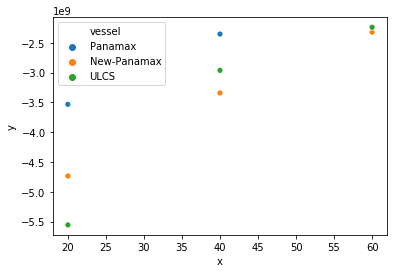

In [3]:
PV_df = pd.DataFrame()
PVs = [[20, "Panamax",     PV_alt2_20_6000], 
       [20, "New-Panamax", PV_alt2_20_12500], 
       [20, "ULCS",        PV_alt2_20_21000],
       [40, "Panamax",     PV_alt2_40_6000], 
       [40, "New-Panamax", PV_alt2_40_12500], 
       [40, "ULCS",        PV_alt2_40_21000],
       [60, "Panamax",     PV_alt2_60_6000], 
       [60, "New-Panamax", PV_alt2_60_12500], 
       [60, "ULCS",        PV_alt2_60_21000]]
  
# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['x', 'vessel', 'y']) 
PV_df['x'] = PV_df['x'].astype(float)
display(PV_df.head())
# display(PV_df.dtypes)

sns.scatterplot(x='x', y='y', data = PV_df, hue = "vessel")

In [4]:
PV_alt1_6000  = -2.959270e+09
PV_alt1_12500 = -2.559270e+09
PV_alt1_21000 = -2.359270e+09

PVs_1 = [["Panamax",     20, PV_alt1_6000,  'Alt1'], 
         ["New-Panamax", 20, PV_alt1_12500, 'Alt1'], 
         ["ULCS",        20, PV_alt1_21000, 'Alt1'],
         ["Panamax",     40, PV_alt1_6000,  'Alt1'], 
         ["New-Panamax", 40, PV_alt1_12500, 'Alt1'], 
         ["ULCS",        40, PV_alt1_21000, 'Alt1'],
         ["Panamax",     60, PV_alt1_6000,  'Alt1'], 
         ["New-Panamax", 60, PV_alt1_12500, 'Alt1'], 
         ["ULCS",        60, PV_alt1_21000, 'Alt1']]

PVs_2 = [["Panamax",     20, PV_alt2_20_6000,  'Alt2'], 
         ["New-Panamax", 20, PV_alt2_20_12500, 'Alt2'], 
         ["ULCS",        20, PV_alt2_20_21000, 'Alt2'],
         ["Panamax",     40, PV_alt2_40_6000,  'Alt2'], 
         ["New-Panamax", 40, PV_alt2_40_12500, 'Alt2'], 
         ["ULCS",        40, PV_alt2_40_21000, 'Alt2'],
         ["Panamax",     60, PV_alt2_60_6000,  'Alt2'], 
         ["New-Panamax", 60, PV_alt2_60_12500, 'Alt2'], 
         ["ULCS",        60, PV_alt2_60_21000, 'Alt2']]

PV_alt3_20_6000 =  0.6 * PV_alt2_20_6000
PV_alt3_20_12500 = 0.6 * PV_alt2_20_12500
PV_alt3_20_21000 = 0.6 * PV_alt2_20_21000
PV_alt3_40_6000 =  1.1 * PV_alt2_40_6000
PV_alt3_40_12500 = 1.1 * PV_alt2_40_12500
PV_alt3_40_21000 = 1.1 * PV_alt2_40_21000
PV_alt3_60_6000 =  0.9 * PV_alt2_60_6000
PV_alt3_60_12500 = 1.0 * PV_alt2_60_12500
PV_alt3_60_21000 = 1.1 * PV_alt2_60_21000

PVs_3 = [["Panamax",     20, PV_alt3_20_6000,  'Alt3'], 
         ["New-Panamax", 20, PV_alt3_20_12500, 'Alt3'], 
         ["ULCS",        20, PV_alt3_20_21000, 'Alt3'],
         ["Panamax",     40, PV_alt3_40_6000,  'Alt3'], 
         ["New-Panamax", 40, PV_alt3_40_12500, 'Alt3'], 
         ["ULCS",        40, PV_alt3_40_21000, 'Alt3'],
         ["Panamax",     60, PV_alt3_60_6000,  'Alt3'], 
         ["New-Panamax", 60, PV_alt3_60_12500, 'Alt3'], 
         ["ULCS",        60, PV_alt3_60_21000, 'Alt3']]

df_1 = pd.DataFrame(PVs_1,columns=['vessel','distance','PV','Alternative'])
df_1['distance'] = df_1['distance'].astype(float)
# df_1['x'] = df_1['x'].astype('category')
# display(df_1)
# display(df_1.dtypes)

df_2 = pd.DataFrame(PVs_2,columns=['vessel','distance','PV','Alternative'])
df_2['distance'] = df_2['distance'].astype(float)
# df_2['x'] = df_2['x'].astype('category')
display(df_2)
# display(df_2.dtypes)

df_3 = pd.DataFrame(PVs_3,columns=['vessel','distance','PV','Alternative'])
df_3['distance'] = df_2['distance'].astype(float)
# display(df_3)
# display(df_3.dtypes)

dfs = [df_1, df_2, df_3]
dfs = pd.concat(dfs)
# display(dfs)

,vessel,distance,PV,Alternative
0,Panamax,20.0,-3.531382e+09,Alt2
1,New-Panamax,20.0,-4.734573e+09,Alt2
2,ULCS,20.0,-5.555650e+09,Alt2
3,Panamax,40.0,-2.351991e+09,Alt2
4,New-Panamax,40.0,-3.341127e+09,Alt2
5,ULCS,40.0,-2.961447e+09,Alt2
6,Panamax,60.0,-2.237941e+09,Alt2
7,New-Panamax,60.0,-2.319905e+09,Alt2
8,ULCS,60.0,-2.237941e+09,Alt2


<Figure size 432x432 with 0 Axes>

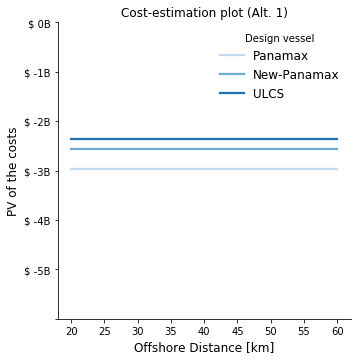

<Figure size 432x432 with 0 Axes>

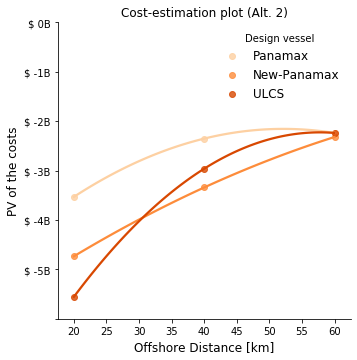

<Figure size 432x432 with 0 Axes>

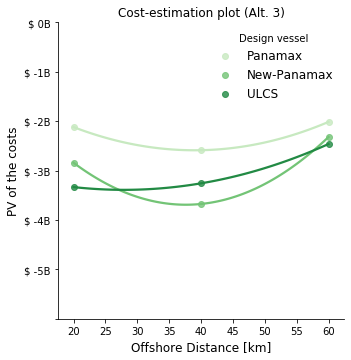

In [5]:
### Alternative 1 ###
plt.figure(figsize=[6,6])

sns.lmplot(x="distance", y="PV", data=df_1, legend=False,scatter = False,
           order=2, truncate=True, palette="Blues", hue="vessel", ci=None);

sns.despine(right=True, top=True)

plt.title('Cost-estimation plot (Alt. 1)', fontsize='large')
plt.xlabel('Offshore Distance [km]', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.yticks(np.arange(0, -7*10**9, step = - 10**9), 
           ["$ 0B","$ -1B","$ -2B","$ -3B","$ -4B", "$ -5B"])
plt.legend(loc='best', title='Design vessel', frameon=False, fontsize='large')

# save fig
plt.savefig("SaveFigures/ex_PV_plot_1.png", bbox_inches = 'tight')
# plt.savefig("SaveFigures/PV_plot_1.png", bbox_inches = 'tight')

### Alternative 2 ###
plt.figure(figsize=[6,6])

sns.lmplot(x="distance", y="PV", data=df_2, legend=False,
           order=2, truncate=True, palette="Oranges", hue="vessel", ci=None);

plt.title('Cost-estimation plot (Alt. 2)', fontsize='large')
plt.xlabel('Offshore Distance [km]', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.yticks(np.arange(0, -7*10**9, step = - 10**9), 
           ["$ 0B","$ -1B","$ -2B","$ -3B","$ -4B", "$ -5B"])
plt.legend(loc='best', title='Design vessel', frameon=False, fontsize='large')

# save fig
plt.savefig("SaveFigures/ex_PV_plot_2.png", bbox_inches = 'tight')
# plt.savefig("SaveFigures/PV_plot_2.png", bbox_inches = 'tight')

### Alternative 3 ###
plt.figure(figsize=[6,6])

sns.lmplot(x="distance", y="PV", data=df_3, legend=False,
           order=2, truncate=True, palette="Greens", hue="vessel", ci=None);

plt.title('Cost-estimation plot (Alt. 3)', fontsize='large')
plt.xlabel('Offshore Distance [km]', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.yticks(np.arange(0, -7*10**9, step = - 10**9), 
           ["$ 0B","$ -1B","$ -2B","$ -3B","$ -4B", "$ -5B"])
plt.legend(loc='best', title='Design vessel', frameon=False, fontsize='large')

# save fig
plt.savefig("SaveFigures/ex_PV_plot_3.png", bbox_inches = 'tight')
# plt.savefig("SaveFigures/PV_plot.png", bbox_inches = 'tight')

## Sensitivity: Demand

,Alternative,Demand,PV
0,Alternative 1,500000.0,2.300000e+09
1,Alternative 1,1000000.0,2.400000e+09
2,Alternative 1,1500000.0,2.500000e+09
3,Alternative 2,500000.0,2.200000e+09
4,Alternative 2,1000000.0,2.350000e+09
5,Alternative 2,1500000.0,2.650000e+09
6,Alternative 3,500000.0,2.150000e+09
7,Alternative 3,1000000.0,2.450000e+09
8,Alternative 3,1500000.0,2.550000e+09


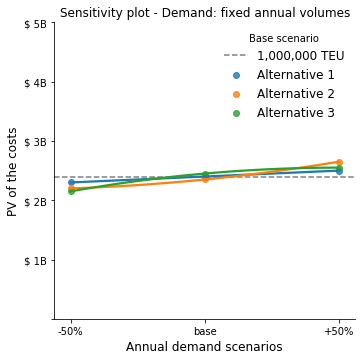

In [6]:
%store -r PV_alt1_40_12500_500000
%store -r PV_alt1_40_12500_1000000
%store -r PV_alt1_40_12500_1500000

%store -r PV_alt2_40_12500_500000
%store -r PV_alt2_40_12500_1000000
%store -r PV_alt2_40_12500_1500000

%store -r PV_alt3_40_12500_500000
%store -r PV_alt3_40_12500_1000000
%store -r PV_alt3_40_12500_1500000

PVs = [['Alternative 1', 500000,  PV_alt1_40_12500_500000],
       ['Alternative 1', 1000000, PV_alt1_40_12500_1000000],
       ['Alternative 1', 1500000, PV_alt1_40_12500_1500000],
       ['Alternative 2', 500000,  PV_alt2_40_12500_500000],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000],
       ['Alternative 2', 1500000, PV_alt2_40_12500_1500000],
       ['Alternative 3', 500000,  PV_alt3_40_12500_500000],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1500000]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Demand', 'PV']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)
display(PV_df)
# display(PV_df.dtypes)

# sensitivity
sns.lmplot(x="Demand", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)

# base scenario
plt.axhline(PV_df.PV[1], linestyle='--', color='tab:grey', label='1,000,000 TEU', zorder=0)

# labels
plt.title('Sensitivity plot - Demand: fixed annual volumes', fontsize='large')
plt.xlabel('Annual demand scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Base scenario')

# ticks
plt.yticks(np.arange(0, 6*10**9, step = 10**9), 
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B"])
plt.xticks([500000, 1000000, 1500000], 
           ["-50%","base","+50%"])

# save fig
plt.savefig("SaveFigures/sensitivity_demand.png", bbox_inches = 'tight')

## Sensitivity: Growing demand

,Alternative,Demand,PV
0,Alternative 1,1000000.0,2.500000e+09
1,Alternative 1,1500000.0,2.700000e+09
2,Alternative 1,2000000.0,3.000000e+09
3,Alternative 1,2500000.0,3.700000e+09
4,Alternative 2,1000000.0,2.200000e+09
5,Alternative 2,1500000.0,3.000000e+09
6,Alternative 2,2000000.0,4.000000e+09
7,Alternative 2,2500000.0,4.800000e+09
8,Alternative 3,1000000.0,2.000000e+09
9,Alternative 3,1500000.0,3.000000e+09


Alternative     object
Demand         float64
PV             float64
dtype: object

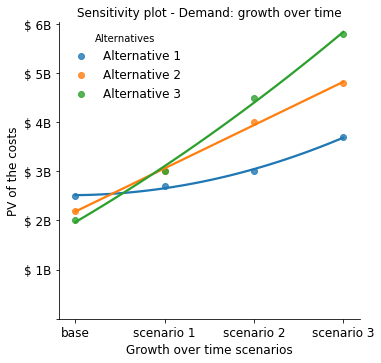

In [7]:
%store -r PV_alt1_40_12500_1000000_growth1
%store -r PV_alt1_40_12500_1000000_growth2
%store -r PV_alt1_40_12500_1000000_growth3
%store -r PV_alt1_40_12500_1000000_growth4

%store -r PV_alt2_40_12500_1000000_growth1
%store -r PV_alt2_40_12500_1000000_growth2
%store -r PV_alt2_40_12500_1000000_growth3
%store -r PV_alt2_40_12500_1000000_growth4

%store -r PV_alt3_40_12500_1000000_growth1
%store -r PV_alt3_40_12500_1000000_growth2
%store -r PV_alt3_40_12500_1000000_growth3
%store -r PV_alt3_40_12500_1000000_growth4

PVs = [['Alternative 1', 1000000, PV_alt1_40_12500_1000000_growth1], 
       ['Alternative 1', 1500000, PV_alt1_40_12500_1000000_growth2], 
       ['Alternative 1', 2000000, PV_alt1_40_12500_1000000_growth3],
       ['Alternative 1', 2500000, PV_alt1_40_12500_1000000_growth4],
       ['Alternative 2', 1000000, PV_alt2_40_12500_1000000_growth1], 
       ['Alternative 2', 1500000, PV_alt2_40_12500_1000000_growth2], 
       ['Alternative 2', 2000000, PV_alt2_40_12500_1000000_growth3],
       ['Alternative 2', 2500000, PV_alt2_40_12500_1000000_growth4],
       ['Alternative 3', 1000000, PV_alt3_40_12500_1000000_growth1], 
       ['Alternative 3', 1500000, PV_alt3_40_12500_1000000_growth2], 
       ['Alternative 3', 2000000, PV_alt3_40_12500_1000000_growth3],
       ['Alternative 3', 2500000, PV_alt3_40_12500_1000000_growth4]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative','Demand', 'PV']) 
PV_df['Demand'] = PV_df['Demand'].astype(float)
display(PV_df)
display(PV_df.dtypes)

# sensitivity
sns.lmplot(x="Demand", y="PV", data=PV_df, legend=False,
           order=2, truncate=True, palette="tab10", hue="Alternative", ci=None)  # confidence interval

# base scenario
# plt.axhline(PV_df.PV[0], linestyle='--', color='tab:grey', label='no growth', zorder=0)

plt.title('Sensitivity plot - Demand: growth over time', fontsize='large')
plt.xlabel('Growth over time scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Alternatives')

plt.yticks(np.arange(0, 7*10**9, step = 10**9), 
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"], size='large')
plt.xticks([1000000, 1500000, 2000000, 2500000], 
           ["base", "scenario 1", "scenario 2", "scenario 3"], size='large')

# save fig
plt.savefig("SaveFigures/sensitivity_demand_growth.png", bbox_inches = 'tight')

## Sensitivity: Bathymetry

,Alternative,Slope,PV
0,Alternative 1,1.0,1.200000e+09
1,Alternative 1,2.0,2.800000e+09
2,Alternative 1,3.0,6.600000e+09
3,Alternative 2,1.0,2.000000e+09
4,Alternative 2,2.0,3.000000e+09
5,Alternative 2,3.0,4.500000e+09
6,Alternative 3,1.0,2.800000e+09
7,Alternative 3,2.0,3.200000e+09
8,Alternative 3,3.0,4.900000e+09


Alternative     object
Slope          float64
PV             float64
dtype: object

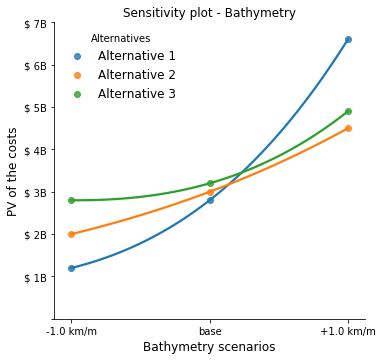

In [8]:
## Sensitivity: Growing demand
%store -r PV_alt1_40_12500_1000000_slope1
%store -r PV_alt1_40_12500_1000000_slope2
%store -r PV_alt1_40_12500_1000000_slope3

%store -r PV_alt2_40_12500_1000000_slope1
%store -r PV_alt2_40_12500_1000000_slope2
%store -r PV_alt2_40_12500_1000000_slope3

%store -r PV_alt3_40_12500_1000000_slope1
%store -r PV_alt3_40_12500_1000000_slope2
%store -r PV_alt3_40_12500_1000000_slope3


PVs = [['Alternative 1', 1.0, PV_alt1_40_12500_1000000_slope1],
       ['Alternative 1', 2.0, PV_alt1_40_12500_1000000_slope2],
       ['Alternative 1', 3.0, PV_alt1_40_12500_1000000_slope3],
       ['Alternative 2', 1.0, PV_alt2_40_12500_1000000_slope1],
       ['Alternative 2', 2.0, PV_alt2_40_12500_1000000_slope2],
       ['Alternative 2', 3.0, PV_alt2_40_12500_1000000_slope3],
       ['Alternative 3', 1.0, PV_alt3_40_12500_1000000_slope1],
       ['Alternative 3', 2.0, PV_alt3_40_12500_1000000_slope2],
       ['Alternative 3', 3.0, PV_alt3_40_12500_1000000_slope3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Slope', 'PV']) 
# PV_df['Alternative'] = PV_df['Alternative'].astype(float)
display(PV_df)
display(PV_df.dtypes)

# sensitivity
sns.lmplot(x="Slope", y="PV", data=PV_df, legend=False,
           order=3, truncate=True, palette="tab10", hue="Alternative", ci=None)

# base scenario
# plt.axhline(PV_df.PV[1], linestyle='--', color='tab:grey', label='2.0 km/m', zorder=0)

# labels
plt.title('Sensitivity plot - Bathymetry', fontsize='large')
plt.xlabel('Bathymetry scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Alternatives')

# ticks
plt.yticks(np.arange(0, 8*10**9, step = 10**9), 
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"])
plt.xticks([1.0, 2.0, 3.0], 
           ["-1.0 km/m","base","+1.0 km/m"])

# save fig
plt.savefig("SaveFigures/sensitivity_bathymetry.png", bbox_inches = 'tight')

## Sensitivity: Weather related downtime - unlimited capacity

,Downtime,PV
0,0.0,2.500000e+09
1,1.0,3.100000e+09
2,2.0,4.100000e+09
3,3.0,5.200000e+09
4,4.0,7.200000e+09


<Figure size 432x288 with 0 Axes>

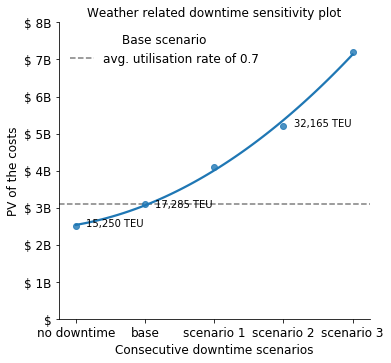

In [9]:
## Sensitivity: weather related downtime

%store -r PV_40_12500_1000000_downtime0
%store -r PV_40_12500_1000000_downtime1
%store -r PV_40_12500_1000000_downtime2
%store -r PV_40_12500_1000000_downtime3
%store -r PV_40_12500_1000000_downtime4

# data
PVs = [[0.0, PV_40_12500_1000000_downtime0],
       [1.0, PV_40_12500_1000000_downtime1], 
       [2.0, PV_40_12500_1000000_downtime2], 
       [3.0, PV_40_12500_1000000_downtime3],
       [4.0, PV_40_12500_1000000_downtime4]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Downtime', 'PV']) 
PV_df['Downtime'] = PV_df['Downtime'].astype(float)
display(PV_df)
# display(PV_df.dtypes)

plt.figure()
# sensitivity
sns.lmplot(x="Downtime", y="PV", data=PV_df,
           order=2, truncate=True, ci=None)

# base scenario
plt.axhline(PV_df.PV[1], linestyle='--', color='tab:grey', label='avg. utilisation rate of 0.7', zorder=0)

# labels
plt.title('Weather related downtime sensitivity plot', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Base scenario',title_fontsize='large')
plt.text(0.15, PV_40_12500_1000000_downtime0, r'15,250 TEU')
plt.text(1.15, 3*10**9, r'17,285 TEU')
plt.text(3.15, PV_40_12500_1000000_downtime3, r'32,165 TEU')

plt.xlabel('Consecutive downtime scenarios', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

# ticks
plt.yticks(np.arange(0, 9*10**9, step = 10**9), 
           ["$","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B", "$ 8B"], 
            size='large')
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0], 
           ["no downtime","base","scenario 1", "scenario 2", "scenario 3"], 
            size='large')

# save fig
plt.savefig("SaveFigures/sensitivity_downtime.png", bbox_inches = 'tight')

## Sensitivity: Weather related downtime - max. capacity

,Event,Capacity,PV
0,Storm event 1,10000.0,2.100000e+09
1,Storm event 1,15000.0,2.800000e+09
2,Storm event 1,20000.0,4.100000e+09
3,Storm event 2,10000.0,3.300000e+09
4,Storm event 2,15000.0,3.100000e+09
5,Storm event 2,20000.0,3.700000e+09
6,Storm event 3,10000.0,6.100000e+09
7,Storm event 3,15000.0,4.100000e+09
8,Storm event 3,20000.0,3.100000e+09


<Figure size 432x288 with 0 Axes>

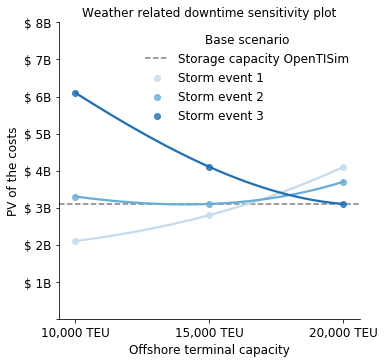

In [10]:
## Sensitivity: weather related downtime

%store -r offshore_capacity

%store -r PV_alt2_40_12500_1000000_downtime1_10000
%store -r PV_alt2_40_12500_1000000_downtime1_15000
%store -r PV_alt2_40_12500_1000000_downtime1_20000
%store -r PV_alt2_40_12500_1000000_downtime2_10000
%store -r PV_alt2_40_12500_1000000_downtime2_15000
%store -r PV_alt2_40_12500_1000000_downtime2_20000
%store -r PV_alt2_40_12500_1000000_downtime3_10000
%store -r PV_alt2_40_12500_1000000_downtime3_15000
%store -r PV_alt2_40_12500_1000000_downtime3_20000

# data
PVs = [['Storm event 1', 10_000, PV_alt2_40_12500_1000000_downtime1_10000],
       ['Storm event 1', 15_000, PV_alt2_40_12500_1000000_downtime1_15000], 
       ['Storm event 1', 20_000, PV_alt2_40_12500_1000000_downtime1_20000],
       ['Storm event 2', 10_000, PV_alt2_40_12500_1000000_downtime2_10000],
       ['Storm event 2', 15_000, PV_alt2_40_12500_1000000_downtime2_15000], 
       ['Storm event 2', 20_000, PV_alt2_40_12500_1000000_downtime2_20000],
       ['Storm event 3', 10_000, PV_alt2_40_12500_1000000_downtime3_10000],
       ['Storm event 3', 15_000, PV_alt2_40_12500_1000000_downtime3_15000], 
       ['Storm event 3', 20_000, PV_alt2_40_12500_1000000_downtime3_20000]]


# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Event','Capacity', 'PV']) 
PV_df['Capacity'] = PV_df['Capacity'].astype(float)
display(PV_df)
# display(PV_df.dtypes)

plt.figure()
# sensitivity
sns.lmplot(x="Capacity", y="PV", data=PV_df, legend=False,
           order=3, truncate=True, palette="Blues", hue="Event", ci=None)

# base scenario
plt.axhline(PV_df.PV[4], linestyle='--', color='tab:grey', label='Storage capacity OpenTISim', zorder=0)

# labels
plt.title('Weather related downtime sensitivity plot', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Base scenario',title_fontsize='large')
# plt.text(10_000, PV_alt2_40_12500_1000000_downtime2_10000, r'...')
# plt.text(15_000, PV_alt2_40_12500_1000000_downtime2_15000, r'...')
# plt.text(20_000, PV_alt2_40_12500_1000000_downtime2_20000, r'...')

plt.xlabel('Offshore terminal capacity', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')

# ticks
plt.yticks(np.arange(0, 9*10**9, step = 10**9), 
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B", "$ 8B"], 
            size='large')
plt.xticks([10_000, 15_000, 20_000], 
           ["10,000 TEU","15,000 TEU","20,000 TEU"], 
            size='large')

# save fig
plt.savefig("SaveFigures/sensitivity_capacity_downtime.png", bbox_inches = 'tight')

## Sensitivity: Hinterland

,Alternative,Hinterland,PV
0,Alternative 2,1.0,4.500000e+09
1,Alternative 2,2.0,3.800000e+09
2,Alternative 2,3.0,2.100000e+09
3,Alternative 3,1.0,2.500000e+09
4,Alternative 3,2.0,3.600000e+09
5,Alternative 3,3.0,4.100000e+09


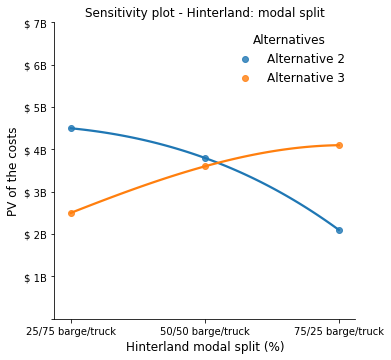

In [11]:
## Sensitivity: Hinterland

%store -r PV_alt2_40_12500_1000000_hinterland1
%store -r PV_alt2_40_12500_1000000_hinterland2
%store -r PV_alt2_40_12500_1000000_hinterland3

%store -r PV_alt3_40_12500_1000000_hinterland1
%store -r PV_alt3_40_12500_1000000_hinterland2
%store -r PV_alt3_40_12500_1000000_hinterland3


PVs = [['Alternative 2', 1.0, PV_alt2_40_12500_1000000_hinterland1],
       ['Alternative 2', 2.0, PV_alt2_40_12500_1000000_hinterland2],
       ['Alternative 2', 3.0, PV_alt2_40_12500_1000000_hinterland3],
       ['Alternative 3', 1.0, PV_alt3_40_12500_1000000_hinterland1],
       ['Alternative 3', 2.0, PV_alt3_40_12500_1000000_hinterland2],
       ['Alternative 3', 3.0, PV_alt3_40_12500_1000000_hinterland3]]

# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Alternative', 'Hinterland', 'PV']) 
# PV_df['Alternative'] = PV_df['Alternative'].astype(float)
display(PV_df)
# display(PV_df.dtypes)

# sensitivity
sns.lmplot(x="Hinterland", y="PV", data=PV_df, legend=False,
           order=3, truncate=True, palette="tab10", hue="Alternative", ci=None)

# base scenario
# plt.axhline(PV_df.PV[1], linestyle='--', color='tab:blue',   label='base scenario', zorder=0)
# plt.axhline(PV_df.PV[4], linestyle='--', color='tab:orange', label='base scenario', zorder=0)

# labels
plt.title('Sensitivity plot - Hinterland: modal split', fontsize='large')
plt.xlabel('Hinterland modal split (%)', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(frameon=False, loc='best', fontsize='large', title='Alternatives', title_fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**9, step = 10**9), 
           ["","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B"])
plt.xticks([1.0, 2.0, 3.0], 
           ["25/75 barge/truck","50/50 barge/truck","75/25 barge/truck"])

# save fig
plt.savefig("SaveFigures/sensitivity_hinterland.png", bbox_inches = 'tight')